## Merging DataFrames

#### Lego database: https://rebrickable.com/downloads/

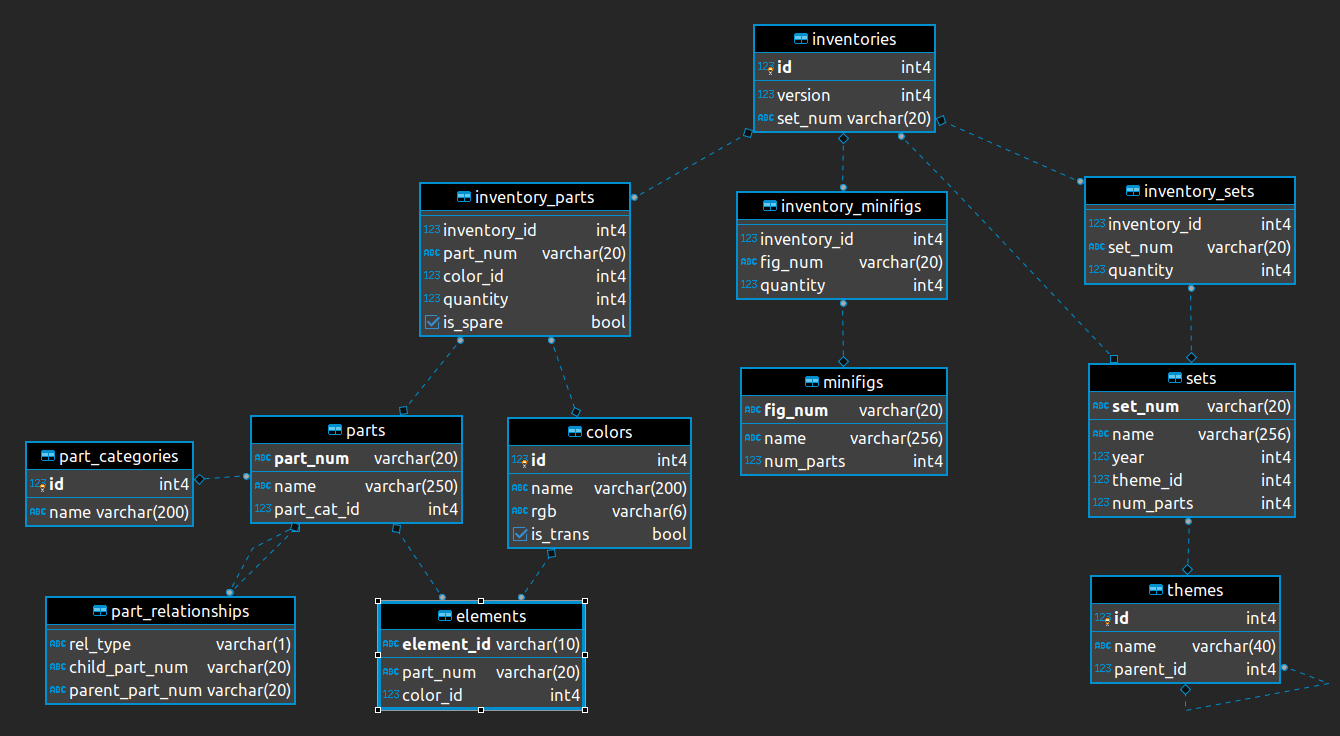

#### Ya no utilizaremos append ni concat, sino "joins" para unir a través de columnas en común.
#### Sin SQL, sino con Pandas.
### Para este ejemplo, nos enfocaremos en las tablas: Themes y Sets:

In [1]:
import pandas

In [2]:
#pandas no se hace problemas al leer archivos comprimidos
sets = pandas.read_csv('MATERIALES-CAP2/02-merging-dataframes/lego-database/sets.csv.gz')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [3]:
themes = pandas.read_csv('MATERIALES-CAP2/02-merging-dataframes/lego-database/themes.csv.gz')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


#### Notamos que la columna en común es: theme_id (Sets) y id (themes)

### Utilizaremos pandas.merge para unirlos:

In [4]:
pandas.merge(sets, themes, left_on ='theme_id', right_on = 'id')

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,1,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,1,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,1,Technic,NaN
...,...,...,...,...,...,...,...,...
16188,K6762-1,Western Kit,2002,475,0,475,Western,NaN
16189,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,430,Pirates,425.0
16190,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,430,Pirates,425.0
16191,LLCA30-1,Pirate Ship Diorama (LLCA Ambassador Pass Excl...,2006,430,127,430,Pirates,425.0


#### theme_id y id están en la tabla a pesar de significar lo mismo

In [5]:
#Lo pasamos a una variable:
sets_with_themes = pandas.merge(sets, themes, left_on ='theme_id', right_on = 'id')

In [6]:
#Ahora lo Eliminamos la variable 'id':
sets_with_themes = sets_with_themes.drop('id', axis=1)
sets_with_themes.head()

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id
0,001-1,Gears,1965,1,43,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,Technic,NaN


### Otro Modo:

#### Cambiando el nombre de las variables, para que solo se unan

In [7]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [9]:
#En nuesta tabla 'themes', cambiaré 'id' por 'theme_id':
themes = themes.rename(columns = {'id': 'theme_id'})
themes.head(2)

,theme_id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0


In [12]:
#Ahora los junto, pero ya no es necesario llamar doble, sino a la columna que se repite: 'themes'
sets_with_themes = pandas.merge(sets, themes, on = 'theme_id')
sets_with_themes.head()

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id
0,001-1,Gears,1965,1,43,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,Technic,NaN


### Hasta ahora todo bien

#### Ahora lidearemos con algunas columnas:

#### Al visualizar la tabla anterior notamos que existe name_x (nombre de Sets), name_y(nombre de Themes) y por último vemos a una columna parent_id que tiene varios valores NaN

In [18]:
#usemos la mismo función agregando un parámetro más
sets_with_themes = pandas.merge(sets, themes, on='theme_id', suffixes=('_set', '_theme'))
sets_with_themes.head()

#Ya no se muestra un nombre_x ni un nombre_y

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id
0,001-1,Gears,1965,1,43,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,Technic,NaN


In [19]:
#Ahora eliminamos o no incluimos el parent_id
#En este caso no lo vamos a considerar, de este modo:
sets_with_themes = pandas.merge(sets, themes.get(['theme_id','name']), on='theme_id', suffixes=('_set', '_theme'))
sets_with_themes.head()

#haciendo uso de la tabla a unir + .get

,set_num,name_set,year,theme_id,num_parts,name_theme
0,001-1,Gears,1965,1,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic
4,1039-1,Manual Control Set 1,1986,1,39,Technic
